In [1]:
#import os
#os._exit(00)

In [2]:
import os
import sys
os.chdir('../')
new_current_dir = os.getcwd()  # get new current working directory
print("New current directory:", new_current_dir)
sys.path.append('./src/python/')

New current directory: /home/fiftyfour/Documents/NetworkPricingGraphContraction


In [3]:
from preamble.preamble import *
from test.test import main

In [4]:
result = main()

Process 000008-super_batch.json: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 73/73 [00:07<00:00, 10.35it/s]


In [5]:
result = result[0]

In [6]:
original_optimal = result['000000-NPP-o45-04']['obj_value']
original_optimal_r_1 = result['000000-NPP-o45-04']['rewind_optimal_1']
original_optimal_r_2 = result['000000-NPP-o45-04']['rewind_optimal_2']
original_time = result['000000-NPP-o45-04']['solve_time']
rows_header = list(map(lambda x: x[0], result['000000-NPP-o45-04']['edge']))
cols_header = list(result.keys())
edge_value_data = [      
                    [ r['edge'][i][2] for r in result.values() ] 
                    for i,_ in enumerate(rows_header)   
                ]

flow_value_data = [      
                    [ r['edge'][i][3] for r in result.values() ] 
                    for i,_ in enumerate(rows_header)   
                ]
# Table of the form
#  edge v1 v2 v3 v4 ....
#   e1  o11
#   e2  o21
#   e3  ...
# ....
edge_value_df = pd.DataFrame(edge_value_data, index = rows_header, columns=cols_header)
flow_value_df = pd.DataFrame(flow_value_data, index = rows_header, columns=cols_header)


## meta_data
cols_header = list(result['000000-NPP-o45-04'].keys())
cols_header.remove('edge')
cols_header.remove('npp_id')
rows_header = list(result.keys())

meta_data = [
                [r[k] for k in cols_header] for r in result.values()
            ]
meta_data_df = pd.DataFrame(meta_data, index=rows_header,columns=cols_header)

In [7]:
edge_value_df.head(3)

,000000-NPP-o45-04,000007-3-3-2-1-NPP-o45-04,000003-2-2-2-1-NPP-o45-04,000001-2-2-2-1-NPP-o45-04,000025-2-2-2-1-NPP-o45-04,000026-3-3-2-1-NPP-o45-04,000002-2-2-2-1-NPP-o45-04,000008-4-4-1-1-NPP-o45-04,000005-3-3-1-1-NPP-o45-04,000006-2-2-1-1-NPP-o45-04,...,000067-5-5-1-0-NPP-o45-04,000046-5-5-1-0-NPP-o45-04,000019-5-5-1-0-NPP-o45-04,000007-5-5-1-0-NPP-o45-04,000014-5-5-1-0-NPP-o45-04,000020-5-5-1-0-NPP-o45-04,000073-5-5-1-0-NPP-o45-04,000025-5-5-1-0-NPP-o45-04,000051-5-5-1-0-NPP-o45-04,000039-5-5-1-0-NPP-o45-04
10,28.0,28.0,1.0,28.0,1.0,1.0,1.0,1.0,1.0,1.0,...,28.0,1.0,28.0,1.0,1.0,30.0,28.0,1.0,1.0,1.0
12,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,...,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0
25,1.0,53.0,1.0,13.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,13.0,1.0,1.0,1.0,13.0,1.0,21.0,13.0


In [8]:
flow_value_df.head(3)

,000000-NPP-o45-04,000007-3-3-2-1-NPP-o45-04,000003-2-2-2-1-NPP-o45-04,000001-2-2-2-1-NPP-o45-04,000025-2-2-2-1-NPP-o45-04,000026-3-3-2-1-NPP-o45-04,000002-2-2-2-1-NPP-o45-04,000008-4-4-1-1-NPP-o45-04,000005-3-3-1-1-NPP-o45-04,000006-2-2-1-1-NPP-o45-04,...,000067-5-5-1-0-NPP-o45-04,000046-5-5-1-0-NPP-o45-04,000019-5-5-1-0-NPP-o45-04,000007-5-5-1-0-NPP-o45-04,000014-5-5-1-0-NPP-o45-04,000020-5-5-1-0-NPP-o45-04,000073-5-5-1-0-NPP-o45-04,000025-5-5-1-0-NPP-o45-04,000051-5-5-1-0-NPP-o45-04,000039-5-5-1-0-NPP-o45-04
10,2,2,2,1,2,2,2,2,2,2,...,1,0,3,0,0,1,1,0,0,0
12,2,2,2,1,2,2,2,2,2,2,...,1,1,3,2,1,1,2,1,1,2
25,6,5,5,3,5,5,4,4,5,5,...,1,0,2,3,0,29,3,0,1,3


(array([2.000e+00, 0.000e+00, 2.000e+00, 5.000e+00, 4.000e+00, 4.000e+00,
        9.000e+00, 2.000e+01, 1.056e+03, 6.700e+01, 3.100e+01, 2.200e+01,
        1.200e+01, 7.000e+00, 8.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
        2.000e+00, 2.000e+00]),
 array([-10961.  ,  -9684.15,  -8407.3 ,  -7130.45,  -5853.6 ,  -4576.75,
         -3299.9 ,  -2023.05,   -746.2 ,    530.65,   1807.5 ,   3084.35,
          4361.2 ,   5638.05,   6914.9 ,   8191.75,   9468.6 ,  10745.45,
         12022.3 ,  13299.15,  14576.  ]),
 <BarContainer object of 20 artists>)

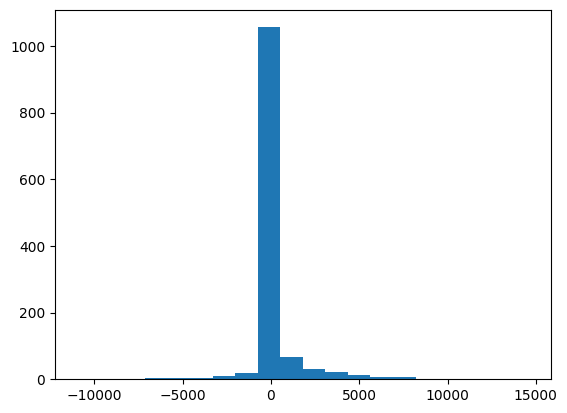

In [17]:
meta_data_df.head(100)
plt.hist(meta_data_df['rewind_optimal_1'] - meta_data_df['rewind_optimal_2'],bins=20)

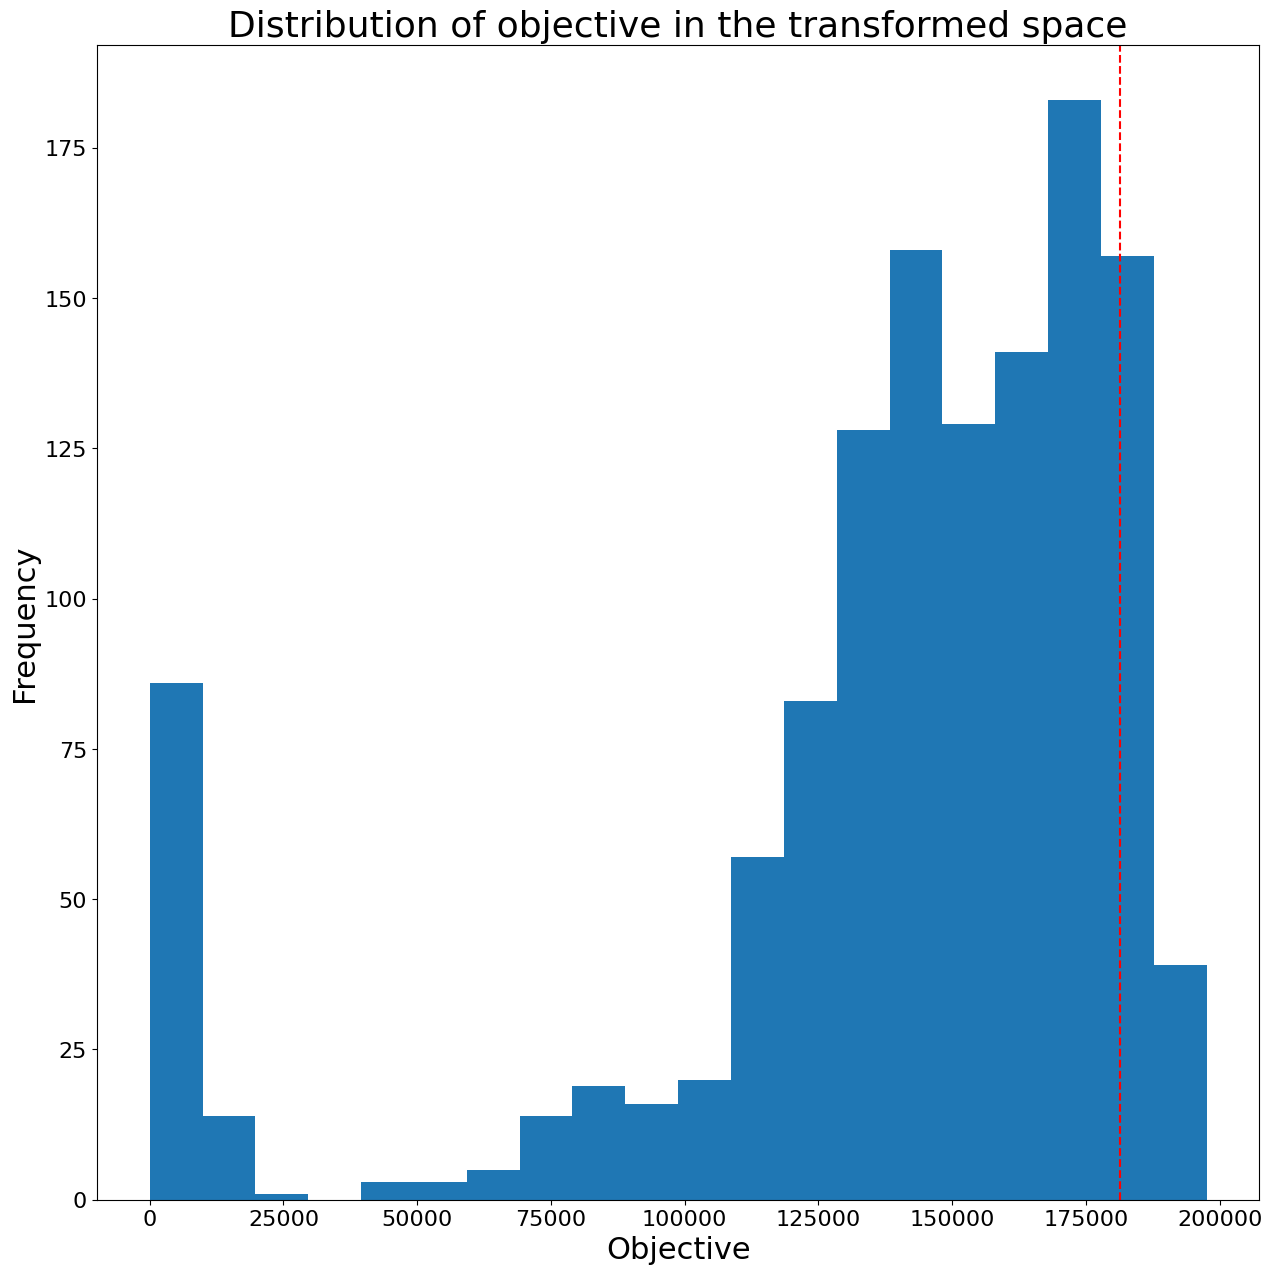

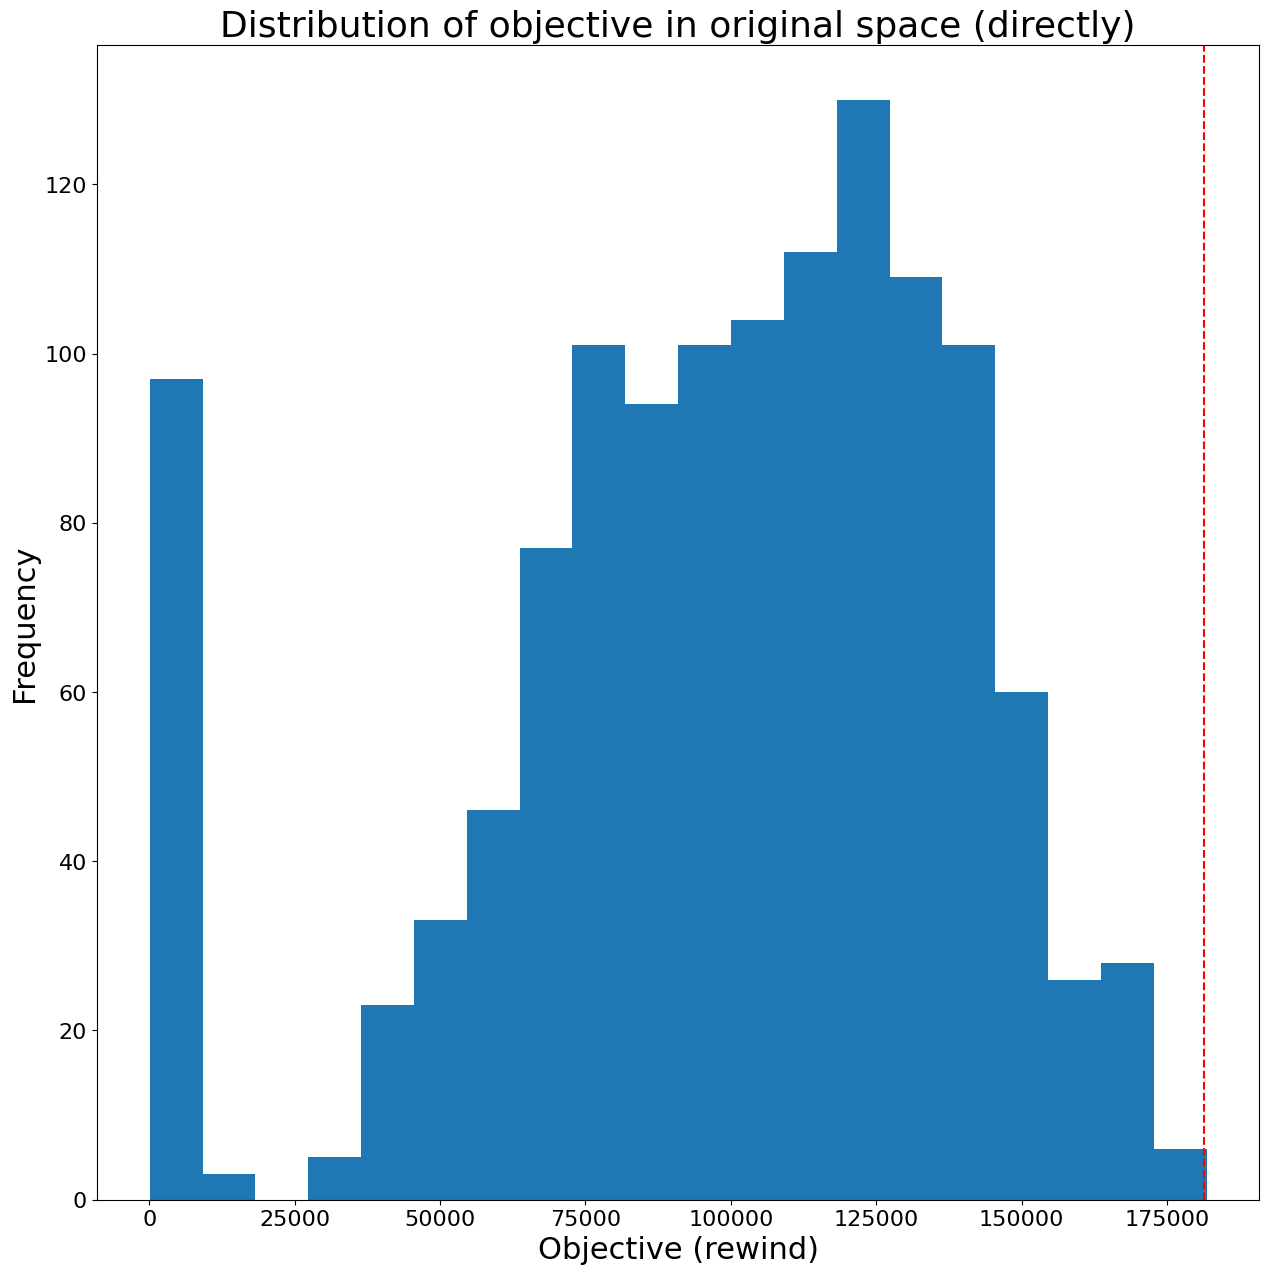

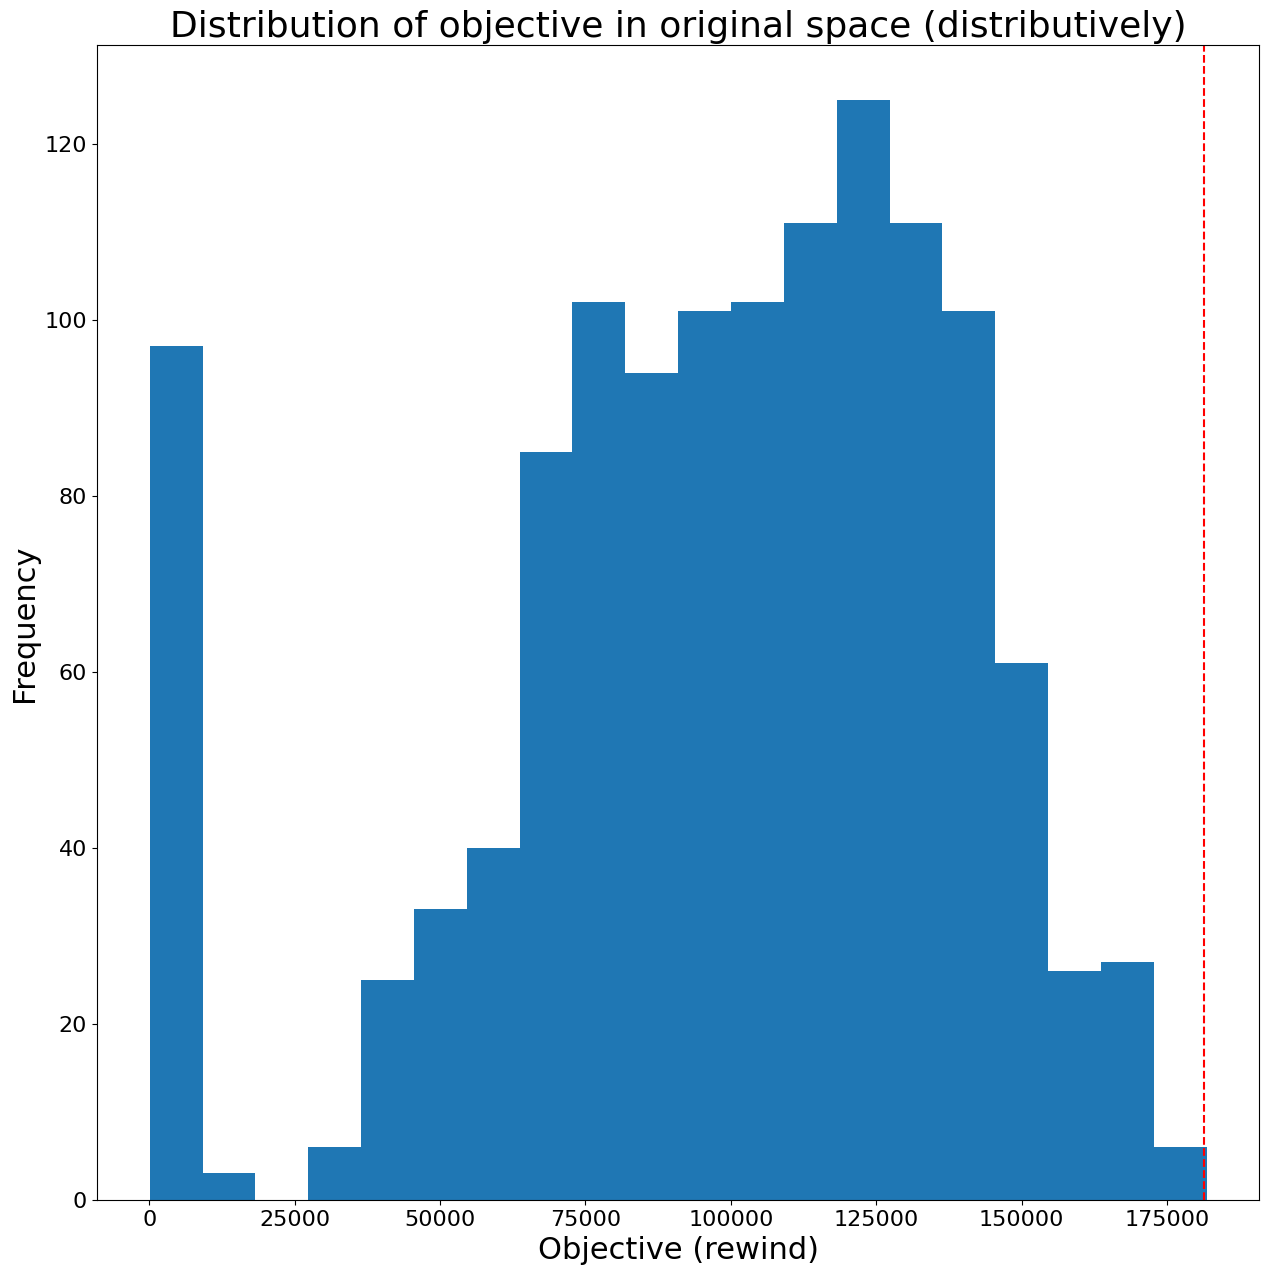

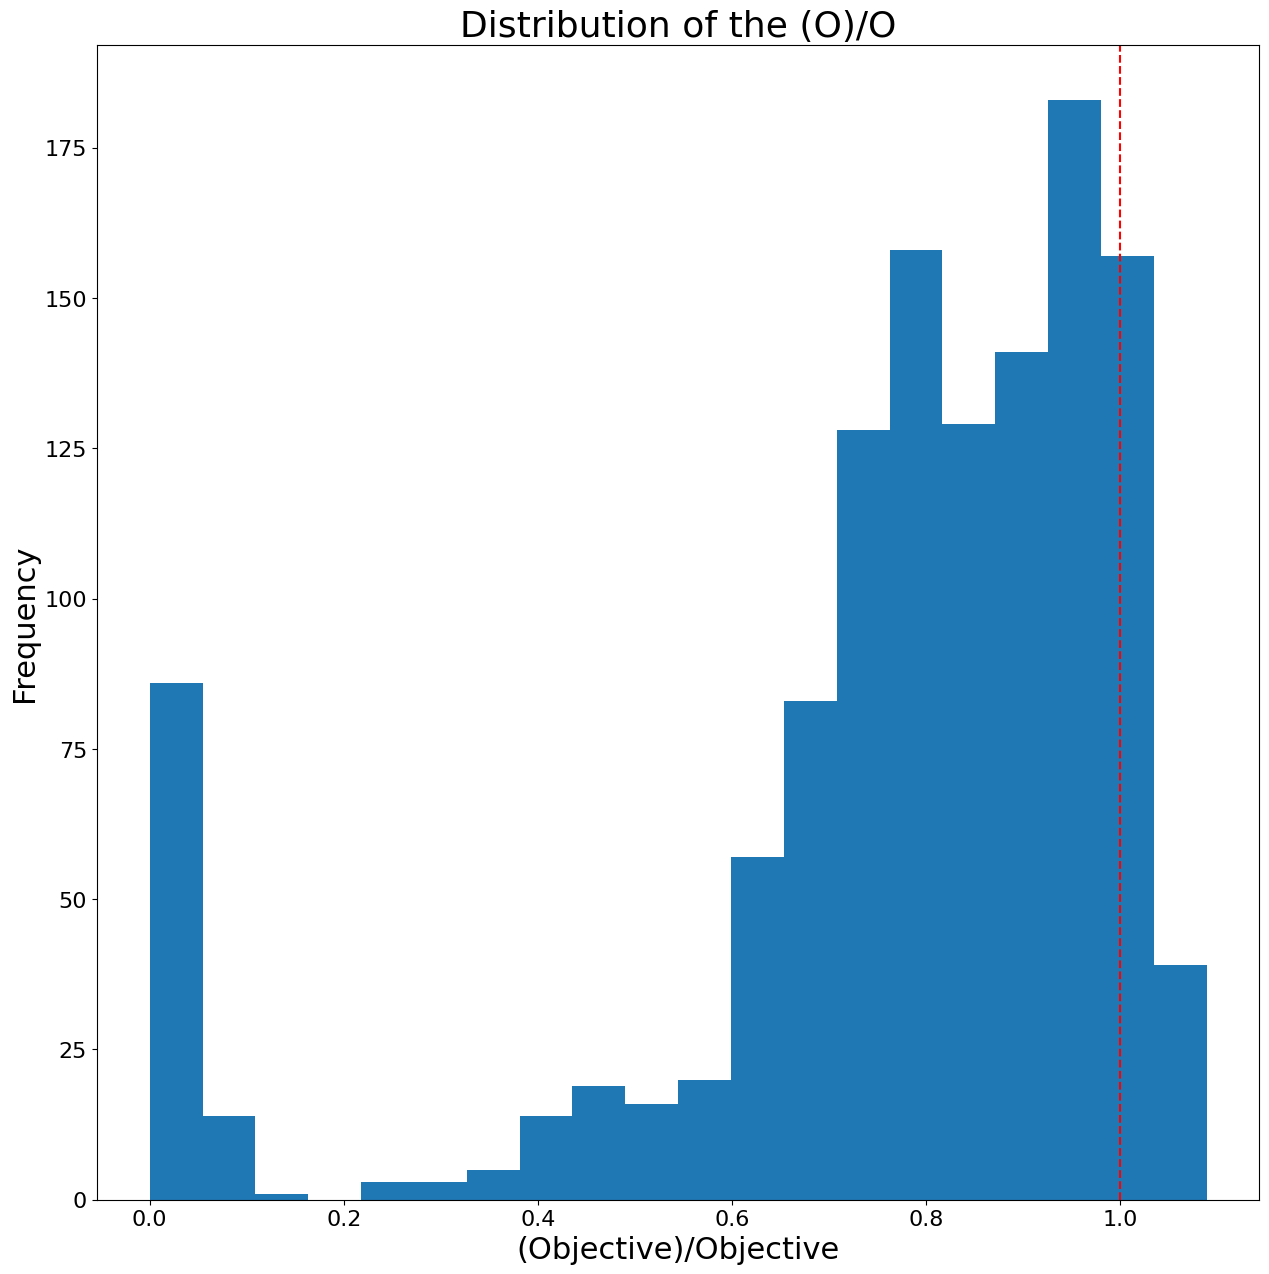

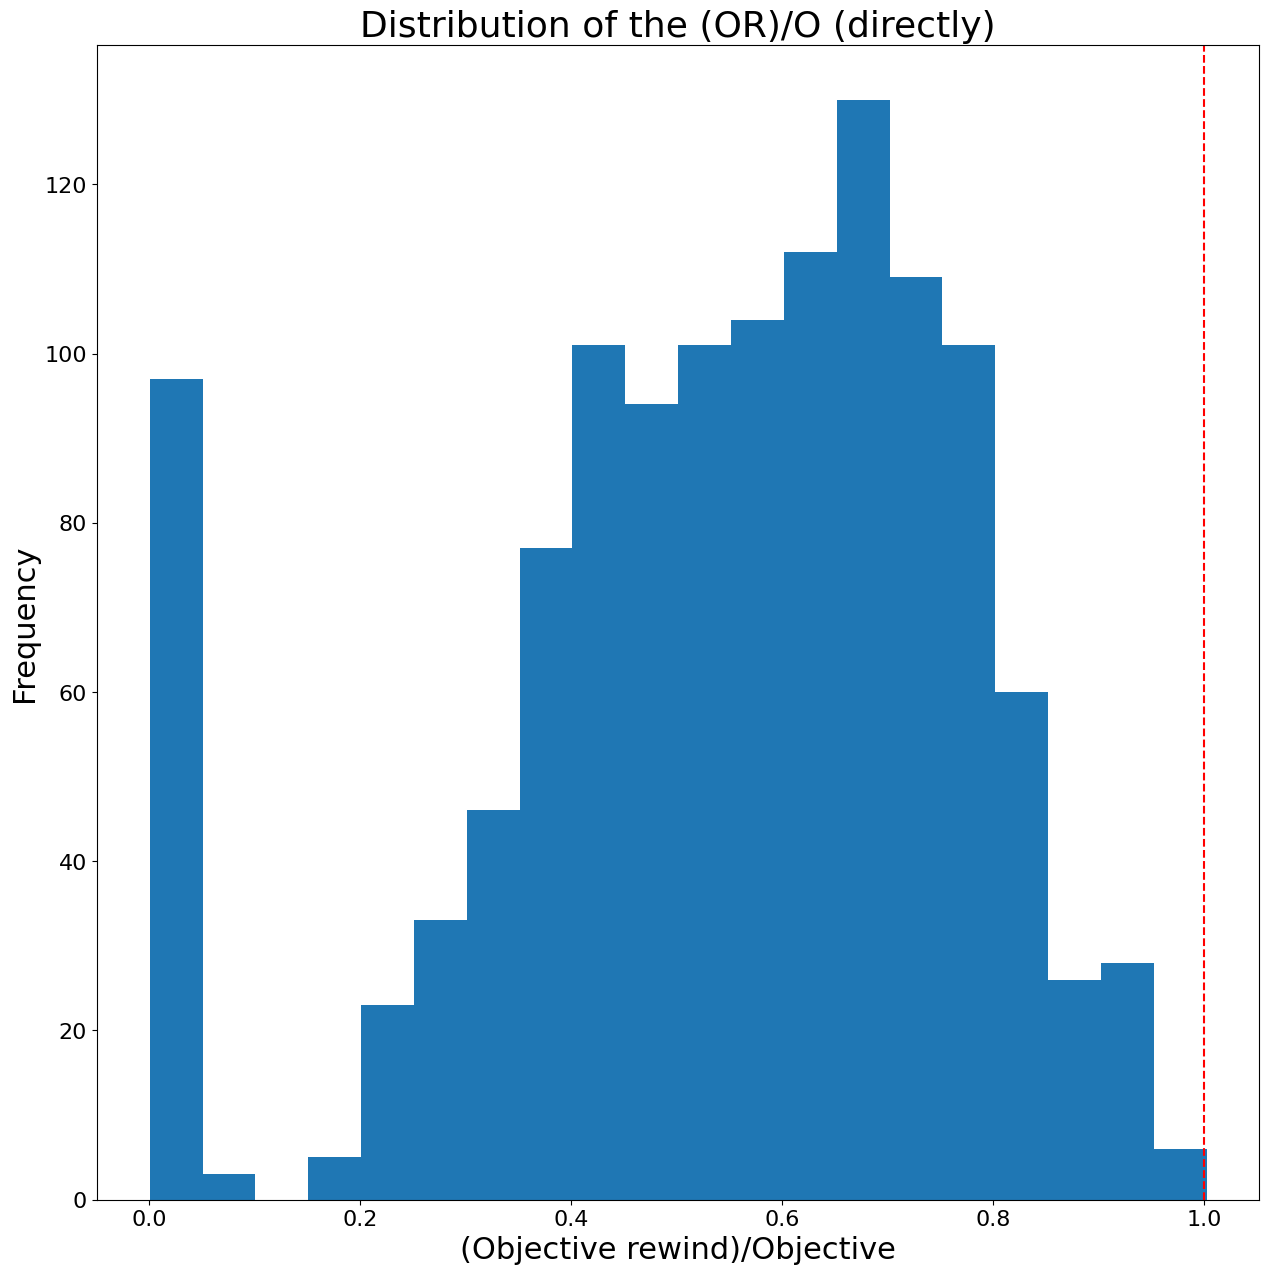

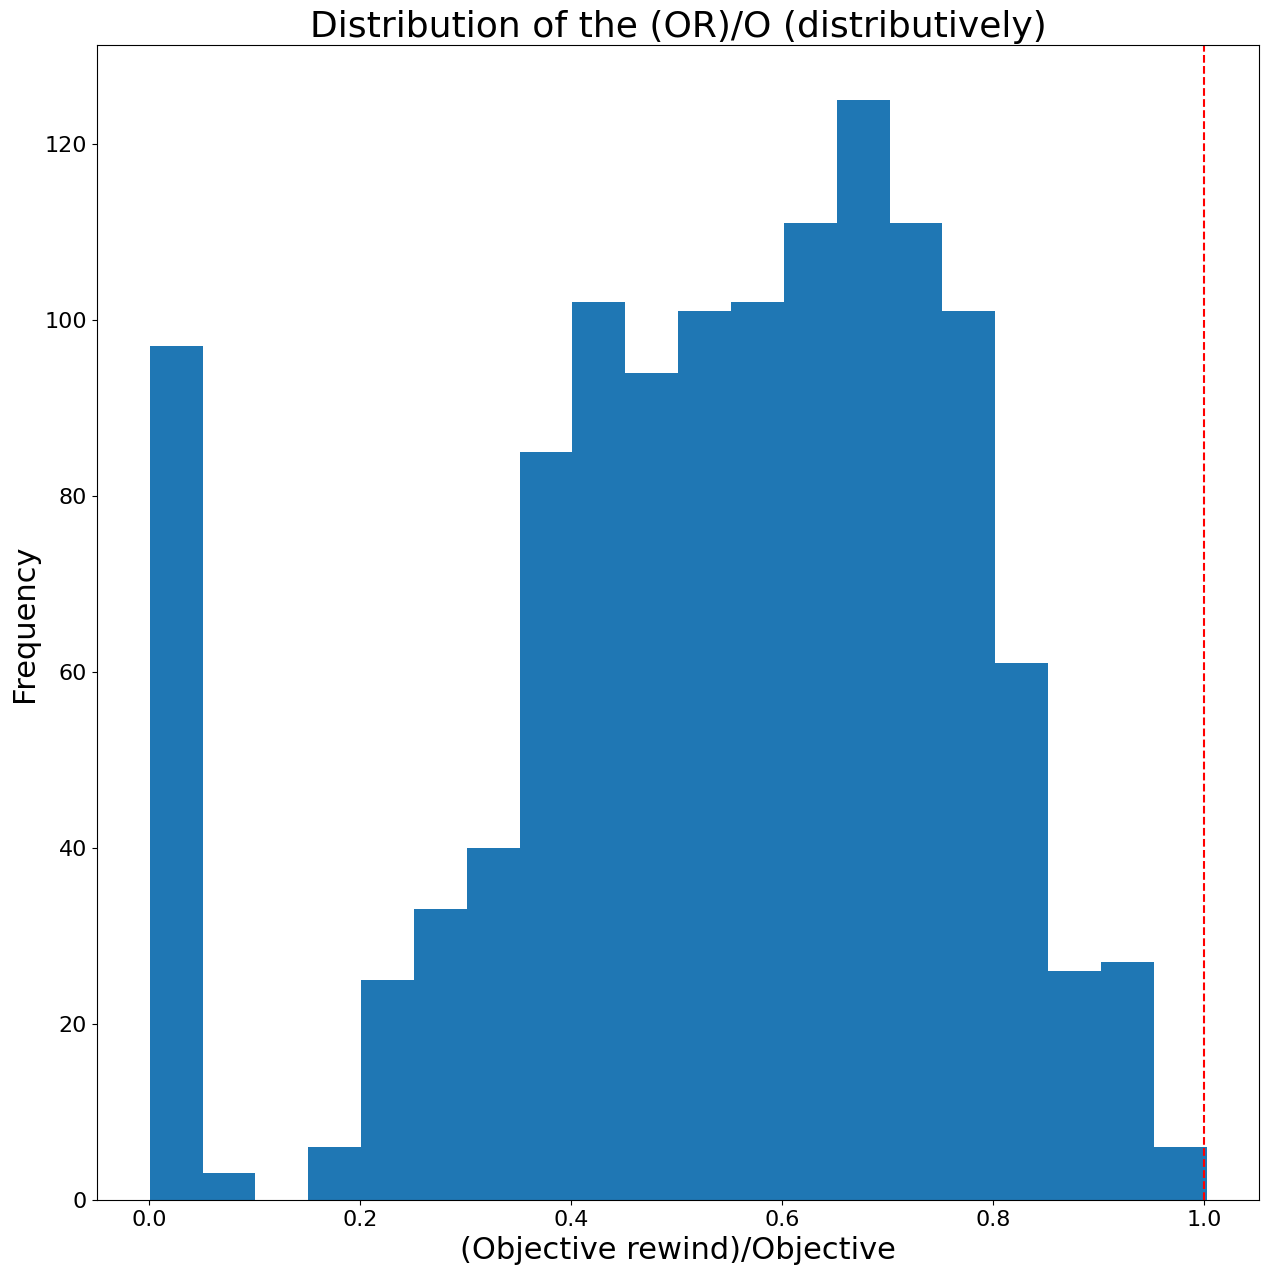

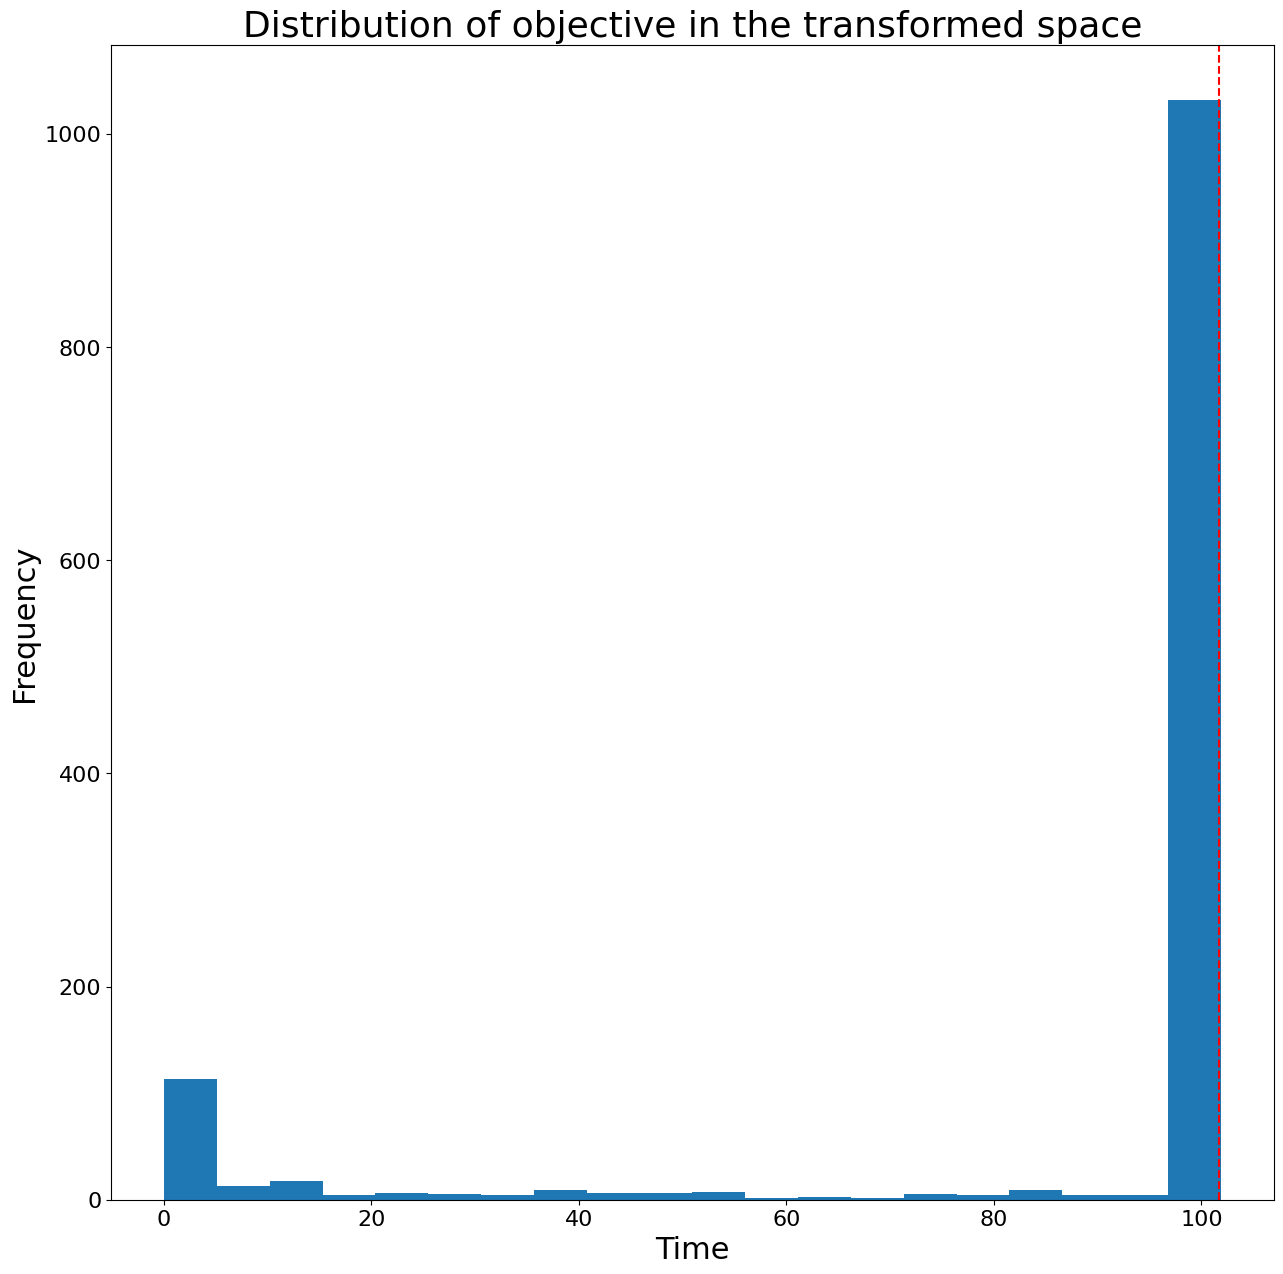

In [10]:
 # setting
ticks_font_size  = 16
label_font_size  = 22
title_font_size  = 26
legend_font_size = 18

fig_x_size = 15
fig_y_size = 15


# plot #1 Distribution (optimal)
plt.figure(figsize=(fig_x_size, fig_y_size))
plt.hist(meta_data_df['obj_value'], bins=20)
plt.axvline(x=original_optimal, color='red', linestyle='--');
plt.xlabel('Objective', fontsize=label_font_size);
plt.ylabel('Frequency', fontsize=label_font_size);
plt.xticks(fontsize=ticks_font_size);
plt.yticks(fontsize=ticks_font_size);
plt.title('Distribution of objective in the transformed space', fontsize=title_font_size);

# plot #2 Distribution optimal rewind directly
plt.figure(figsize=(fig_x_size, fig_y_size))
plt.hist(meta_data_df['rewind_optimal_1'], bins=20)
plt.axvline(x=original_optimal, color='red', linestyle='--');
plt.xlabel('Objective (rewind)', fontsize=label_font_size);
plt.ylabel('Frequency', fontsize=label_font_size);
plt.xticks(fontsize=ticks_font_size);
plt.yticks(fontsize=ticks_font_size);
plt.title('Distribution of objective in original space (directly)', fontsize=title_font_size);

# plot #3 Distribution optimal rewind (distributively)
plt.figure(figsize=(fig_x_size, fig_y_size))
plt.hist(meta_data_df['rewind_optimal_2'], bins=20)
plt.axvline(x=original_optimal, color='red', linestyle='--');
plt.xlabel('Objective (rewind)', fontsize=label_font_size);
plt.ylabel('Frequency', fontsize=label_font_size);
plt.xticks(fontsize=ticks_font_size);
plt.yticks(fontsize=ticks_font_size);
plt.title('Distribution of objective in original space (distributively)', fontsize=title_font_size);

# plot #4 Distribution (optimal) / O
plt.figure(figsize=(fig_x_size, fig_y_size))
plt.hist(meta_data_df['obj_value']/original_optimal, bins=20)
plt.axvline(x=1, color='red', linestyle='--');
plt.xlabel('(Objective)/Objective', fontsize=label_font_size);
plt.ylabel('Frequency', fontsize=label_font_size);
plt.xticks(fontsize=ticks_font_size);
plt.yticks(fontsize=ticks_font_size);
plt.title('Distribution of the (O)/O', fontsize=title_font_size);

# plot #5 Distribution optimal rewind / O (directly)
plt.figure(figsize=(fig_x_size, fig_y_size))
plt.hist(meta_data_df['rewind_optimal_1']/original_optimal, bins=20)
plt.axvline(x=1, color='red', linestyle='--');
plt.xlabel('(Objective rewind)/Objective', fontsize=label_font_size);
plt.ylabel('Frequency', fontsize=label_font_size);
plt.xticks(fontsize=ticks_font_size);
plt.yticks(fontsize=ticks_font_size);
plt.title('Distribution of the (OR)/O (directly)', fontsize=title_font_size);

# plot #6 Distribution optimal rewind / O (distributively)
plt.figure(figsize=(fig_x_size, fig_y_size))
plt.hist(meta_data_df['rewind_optimal_2']/original_optimal, bins=20)
plt.axvline(x=1, color='red', linestyle='--');
plt.xlabel('(Objective rewind)/Objective', fontsize=label_font_size);
plt.ylabel('Frequency', fontsize=label_font_size);
plt.xticks(fontsize=ticks_font_size);
plt.yticks(fontsize=ticks_font_size);
plt.title('Distribution of the (OR)/O (distributively)', fontsize=title_font_size);

# plot #5 Distribution (edge)/edge
### not good


# plot #6 Distribution time
plt.figure(figsize=(fig_x_size, fig_y_size))
plt.hist(meta_data_df['solve_time'], bins=20)
plt.axvline(x=original_time, color='red', linestyle='--');
plt.xlabel('Time', fontsize=label_font_size);
plt.ylabel('Frequency', fontsize=label_font_size);
plt.xticks(fontsize=ticks_font_size);
plt.yticks(fontsize=ticks_font_size);
plt.title('Distribution of objective in the transformed space', fontsize=title_font_size);



/tmp/ipykernel_54365/2801222152.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=meta_data_df[meta_data_df['H4']=='1'], x='optimal_ratio', hue='cp', ax=axes[0])
/tmp/ipykernel_54365/2801222152.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=meta_data_df[meta_data_df['H4']=='1'], x='solve_time', hue='cp', ax=axes[1])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1500x1500 with 0 Axes>

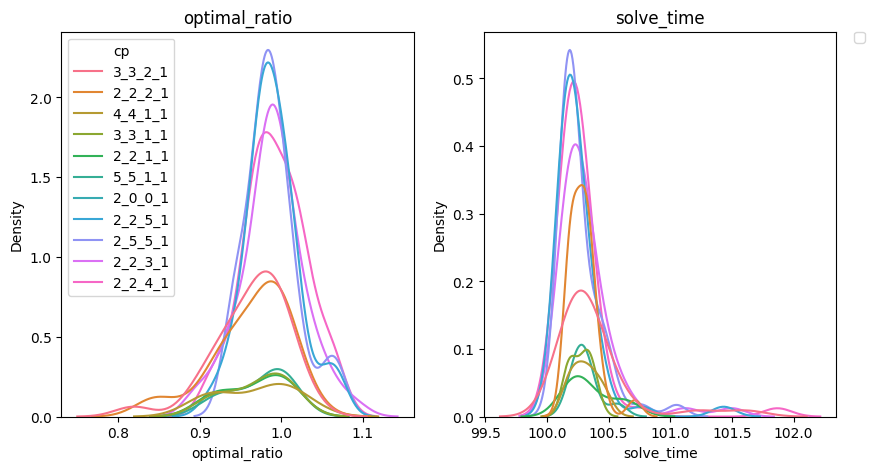

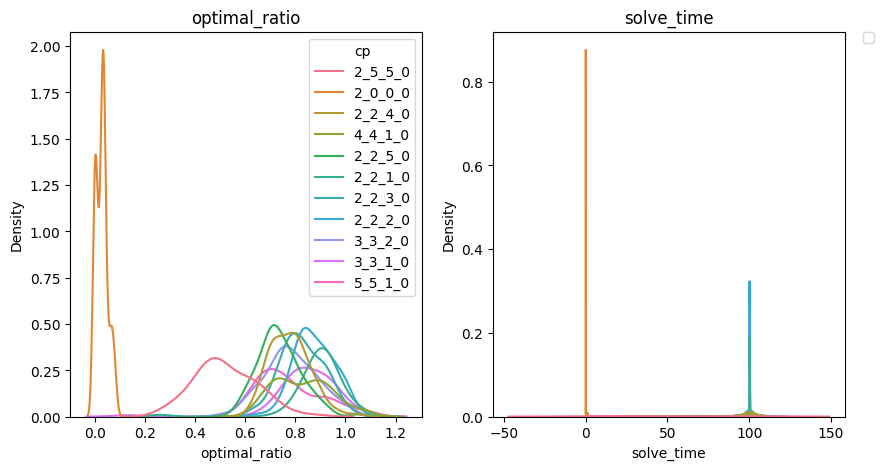

In [11]:
plt.figure(figsize=(fig_x_size, fig_y_size))

# Assuming df is your DataFrame and x, y1, y2, y3, y4 are your columns
meta_data_df['cp'] = meta_data_df['min_sub_length'].astype(str) + '_' + meta_data_df['max_sub_length'].astype(str) + '_' + meta_data_df['number_not_trivial_class'].astype(str)+ '_' +meta_data_df['H4'].astype(str)
meta_data_df['optimal_ratio'] = meta_data_df['obj_value']/original_optimal	

fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
sns.kdeplot(data=meta_data_df[meta_data_df['H4']=='1'], x='optimal_ratio', hue='cp', ax=axes[0])
axes[0].set_title('optimal_ratio')
sns.kdeplot(data=meta_data_df[meta_data_df['H4']=='1'], x='solve_time', hue='cp', ax=axes[1])
axes[1].set_title('solve_time')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
sns.kdeplot(data=meta_data_df[meta_data_df['H4']=='0'], x='optimal_ratio', hue='cp', ax=axes[0])
axes[0].set_title('optimal_ratio')
sns.kdeplot(data=meta_data_df[meta_data_df['H4']=='0'], x='solve_time', hue='cp', ax=axes[1])
axes[1].set_title('solve_time')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



In [12]:

# Assuming df is your DataFrame and x, y1, y2, y3, y4 are your columns
meta_data_df['cp'] = meta_data_df['min_sub_length'].astype(str) + '_' + meta_data_df['max_sub_length'].astype(str) + '_' + meta_data_df['number_not_trivial_class'].astype(str)+ '_' +meta_data_df['H4'].astype(str)
meta_data_df['optimal_ratio_rewind_1'] = meta_data_df['rewind_optimal_1']/original_optimal	
meta_data_df['optimal_ratio_rewind_2'] = meta_data_df['rewind_optimal_2']/original_optimal	

fig, axes = plt.subplots(ncols=2, figsize=(fig_x_size, fig_y_size/2))
sns.kdeplot(data=meta_data_df[meta_data_df['H4']=='1'], x='optimal_ratio_rewind_1', hue='cp', ax=axes[0])
axes[0].axvline(x=1, color='red', linestyle='--');
axes[0].set_title('rewind_optimal_1')

sns.kdeplot(data=meta_data_df[meta_data_df['H4']=='1'], x='optimal_ratio_rewind_2', hue='cp', ax=axes[1])
axes[1].axvline(x=1, color='red', linestyle='--');
axes[1].set_title('rewind_optimal_2')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('./figure/rewind_optimal_ratio_1.pdf',  bbox_inches='tight')
plt.close()

fig, axes = plt.subplots(ncols=2, figsize=(fig_x_size, fig_y_size/2))
sns.kdeplot(data=meta_data_df[meta_data_df['H4']=='0'], x='optimal_ratio_rewind_1', hue='cp', ax=axes[0])
axes[0].axvline(x=1, color='red', linestyle='--');
axes[0].set_title('rewind_optimal_1')
sns.kdeplot(data=meta_data_df[meta_data_df['H4']=='0'], x='optimal_ratio_rewind_2', hue='cp', ax=axes[1])
axes[1].axvline(x=1, color='red', linestyle='--');
axes[1].set_title('rewind_optimal_2')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('./figure/rewind_optimal_ratio_0.pdf',  bbox_inches='tight')
plt.close()

/tmp/ipykernel_54365/286641860.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=meta_data_df[meta_data_df['H4']=='1'], x='optimal_ratio_rewind_1', hue='cp', ax=axes[0])
/tmp/ipykernel_54365/286641860.py:11: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=meta_data_df[meta_data_df['H4']=='1'], x='optimal_ratio_rewind_2', hue='cp', ax=axes[1])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
